<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# 3. EDA

---

In [1]:
# imports
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle

from IPython.display import Image, display

import math
from pydash import get, flatten
import json

from functions import plot_null_values_features_of_df
from functions import plot_values_by_symbol
from functions import get_min_max_date_for_stock_list
from functions import plot_min_max_date_for_hist_data
from functions import plot_moving_average_by_symbol, plot_value_difference_between_each_column_against_previous_by_symbol

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)   # Disable column width restriction
#pd.set_option('display.max_colwidth', 100)

## 3.1 Import datasets

### 3.1.1 Import ticker info dataset

In [2]:
ticker_info_df = pd.read_csv("./Data/merged_non_datetime_df_complete.csv")

In [3]:
ticker_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4654 non-null   int64 
 1   symbol       4653 non-null   object
 2   name         3631 non-null   object
 3   sector       3265 non-null   object
 4   industry     3265 non-null   object
 5   description  3276 non-null   object
 6   type         3633 non-null   object
 7   CEO          3136 non-null   object
 8   country      3633 non-null   object
dtypes: int64(1), object(8)
memory usage: 327.4+ KB


In [4]:
ticker_info_df.head()

Unnamed: 0 symbol                         name       sector       industry  \
0           0   AACG                          NaN          NaN            NaN   
1           1  AACIW   Armada Acquisition Corp. I          NaN            NaN   
2           2   AADI        Aadi Bioscience, Inc.   Healthcare  Biotechnology   
3           3   AADR                          NaN          NaN            NaN   
4           4    AAL  American Airlines Group Inc  Industrials       Airlines   

                                         description          type  \
0                                                NaN           NaN   
1                                                NaN  Common Stock   
2  Aadi Bioscience, Inc., a clinical-stage biopha...  Common Stock   
3                                                NaN           NaN   
4  American Airlines Group Inc., through its subs...  Common Stock   

                           CEO country  
0                          NaN     NaN  
1                          NaN      US  
2  Mr. Scott M. Giacobello CPA      US  
3                          NaN     NaN  
4       Mr. Robert D. Isom Jr.      US

In [5]:
ticker_info_df.drop(columns=['Unnamed: 0'],inplace = True)

In [6]:
ticker_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symbol       4653 non-null   object
 1   name         3631 non-null   object
 2   sector       3265 non-null   object
 3   industry     3265 non-null   object
 4   description  3276 non-null   object
 5   type         3633 non-null   object
 6   CEO          3136 non-null   object
 7   country      3633 non-null   object
dtypes: object(8)
memory usage: 291.0+ KB


In [7]:
ticker_info_df.head()

symbol                         name       sector       industry  \
0   AACG                          NaN          NaN            NaN   
1  AACIW   Armada Acquisition Corp. I          NaN            NaN   
2   AADI        Aadi Bioscience, Inc.   Healthcare  Biotechnology   
3   AADR                          NaN          NaN            NaN   
4    AAL  American Airlines Group Inc  Industrials       Airlines   

                                         description          type  \
0                                                NaN           NaN   
1                                                NaN  Common Stock   
2  Aadi Bioscience, Inc., a clinical-stage biopha...  Common Stock   
3                                                NaN           NaN   
4  American Airlines Group Inc., through its subs...  Common Stock   

                           CEO country  
0                          NaN     NaN  
1                          NaN      US  
2  Mr. Scott M. Giacobello CPA      US  
3                          NaN     NaN  
4       Mr. Robert D. Isom Jr.      US

In [8]:
ticker_info_df[ticker_info_df.isnull().any(axis=1)]

symbol                                               name  \
0      AACG                                                NaN   
1     AACIW                         Armada Acquisition Corp. I   
3      AADR                                                NaN   
8      AAPB                                                NaN   
9      AAPD                                                NaN   
11     AAPU                                                NaN   
12     AAXJ                                                NaN   
15     ABCM                                                NaN   
18      ABL                                    Abacus Life Inc   
19    ABLLW                                                NaN   
25     ABVC           American BriVision (Holding) Corporation   
26    ACABU                                                NaN   
27    ACABW              Atlantic Coastal Acquisition Corp. II   
29    ACAHW                                                NaN   
30    ACAXR                    Alset Capital Acquisition Corp.   
31    ACAXW                    Alset Capital Acquisition Corp.   
34    ACBAU                                                NaN   
36     ACDC                               ProFrac Holding Corp   
41    ACGLO                                                NaN   
54    ACONW                                     Aclarion, Inc.   
59     ACST                                  Acasti Pharma Inc   
60      ACT                                                NaN   
63     ACWI                                                NaN   
64     ACWX                                                NaN   
67     ADAP                                                NaN   
71    ADERW                       26 Capital Acquisition Corp.   
78    ADNWW                 Advent Technologies Holdings, Inc.   
83    ADSEW                                 ADS-TEC Energy PLC   
86    ADTHW                   AdTheorent Holding Company, Inc.   
92     ADXN                                                NaN   
93    AEAEW                        AltEnergy Acquisition Corp.   
100   AENTW                                                NaN   
111    AFRI                                Forafric Global PLC   
113    AFYA                                           Afya Ltd   
115    AGBA                               Agba Acquisition Ltd   
116   AGBAW                         AGBA Group Holding Limited   
121    AGLE                         Aeglea BioTherapeutics Inc   
122    AGNC                                                NaN   
124   AGNCM                                                NaN   
125   AGNCN                                                NaN   
126   AGNCO                                                NaN   
127   AGNCP                                                NaN   
128    AGNG                                                NaN   
133    AGZD                                                NaN   
135     AHG                                                NaN   
137     AIA                                                NaN   
139     AIH                                                NaN   
141   AIMBU             Aimfinity Investment Corp. I - Subunit   
143   AIMDW                                        Ainos, Inc.   
145     AIQ                                                NaN   
147    AIRR                                                NaN   
150    AIXI                                                NaN   
157    AKTX                                                NaN   
163   ALCYU                                                NaN   
164   ALCYW                                                NaN   
180   ALORU                                                NaN   
182    ALPA                          Alpa Laboratories Limited   
183   ALPAU                                                NaN   
184   ALPAW                                                NaN   
192   ALSAR                 Alpha Star Acquis

In [9]:
len(ticker_info_df[ticker_info_df.isnull().any(axis=1)])

1524

**Remarks:**
- 1524 rows out of 4654 entries with at least 1 missing value

**Export dataset for 4.Preprocessing and Modelling.ipynb**

In [10]:
ticker_info_df.to_pickle("./Data/merged_non_datetime_pre_process_df.pkl")

### 3.1.2 Import ticker income_statement + balance_sheet + cashflow dataset

In [11]:
ticker_financial_df = pd.read_csv("./Data/merged_datetime_df_complete.csv")

In [12]:
ticker_financial_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14754 entries, 0 to 14753
Data columns (total 341 columns):
 #    Column                                                                   Non-Null Count  Dtype  
---   ------                                                                   --------------  -----  
 0    date                                                                     14754 non-null  object 
 1    symbol                                                                   14751 non-null  object 
 2    is_Tax Effect Of Unusual Items                                           14308 non-null  float64
 3    is_Tax Rate For Calcs                                                    14308 non-null  float64
 4    is_Normalized EBITDA                                                     12492 non-null  float64
 5    is_Total Unusual Items                                                   10288 non-null  float64
 6    is_Total Unusual Items Excluding Goodwill                   

In [13]:
ticker_financial_df.head()

date symbol  is_Tax Effect Of Unusual Items  is_Tax Rate For Calcs  \
0  2022-12-31   AACG                    1.427311e+05               0.108618   
1  2021-12-31   AACG                    1.108712e+06               0.040569   
2  2020-12-31   AACG                   -7.102703e+05               0.092634   
3  2019-12-31   AACG                   -1.832013e+06               0.051312   
4  2022-09-30  AACIW                    0.000000e+00               0.400000   

   is_Normalized EBITDA  is_Total Unusual Items  \
0           -57900627.0               1314063.0   
1           -93718591.0              27329108.0   
2           -96690477.0              -7667472.0   
3           -73136676.0             -35703320.0   
4            -4503115.0                     NaN   

   is_Total Unusual Items Excluding Goodwill  \
0                                  1314063.0   
1                                 27329108.0   
2                                 -7667472.0   
3                                -35703320.0   
4                                        NaN   

   is_Net Income From Continuing Operation Net Minority Interest  \
0                                        -47892909.0               
1                                        -33649593.0               
2                                        -92198032.0               
3                                       -127048595.0               
4                                         -3622794.0               

   is_Reconciled Depreciation  is_Reconciled Cost Of Revenue      is_EBIT  \
0                  22590666.0                    104315856.0  -56586564.0   
1                  23025480.0                     97413915.0  -66389483.0   
2                  29913815.0                     98521027.0 -104357949.0   
3                  17545060.0                     61914502.0 -108839996.0   
4                         NaN                            NaN   -4503115.0   

   is_Net Interest Income  is_Normalized Income  \
0                756886.0         -4.906424e+07   
1               1110681.0         -5.986999e+07   
2               1171837.0         -8.524083e+07   
3               3281701.0         -9.317729e+07   
4               1025942.0         -3.622794e+06   

   is_Net Income From Continuing And Discontinued Operation  \
0                                        -47892909.0          
1                                        -33649593.0          
2                                        -92198032.0          
3                                       -122154398.0          
4                                         -3622794.0          

   is_Total Expenses  is_Total Operating Income As Reported  \
0        263407438.0                            -56586564.0   
1        268598948.0                            -66389483.0   
2        266525496.0                           -107478374.0   
3        206610163.0                            -91409171.0   
4          4503115.0                             -4503115.0   

   is_Diluted Average Shares  is_Basic Average Shares  is_Diluted EPS  \
0                 31376920.0               31376920.0           -1.52   
1                 31374048.0               31374048.0           -1.14   
2                 31330018.0               31330018.0           -3.14   
3                 25457855.0               25457855.0           -5.04   
4                        NaN                      NaN             NaN   

   is_Basic EPS  is_Diluted NI Availto Com Stockholders  \
0         -1.52                             -47892909.0   
1         -1.14                             -33649593.0   
2         -3.14                             -92198032.0   
3         -5.04                            -122154398.0   
4           NaN                              -3622794.0   

   is_Net Income Common Stockholders  is_Net Income  is_Minority Interests  \
0                        -47892909.0    -47892909.0               701322.0   
1                        -33649593.0    -33649593.0

In [14]:
len(ticker_financial_df[ticker_financial_df.isnull().any(axis=1)])

14754

**Remarks:**
- All rows have at least 1 missing value

**Export dataset for 4.Preprocessing and Modelling.ipynb**

In [15]:
ticker_financial_df.to_pickle("./Data/ticker_financial_pre_process_df.pkl")

### 3.1.3 Import ticker year_end historical dataset

In [16]:
ticker_year_hist_df = pd.read_csv("./Data/ohlc_year_end_df_complete.csv")

In [17]:
ticker_year_hist_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27987 entries, 0 to 27986
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  27987 non-null  object 
 1   open      27987 non-null  float64
 2   high      27987 non-null  float64
 3   low       27987 non-null  float64
 4   close     27987 non-null  float64
 5   volume    27985 non-null  float64
 6   symbol    27987 non-null  object 
 7   currency  27987 non-null  object 
 8   year      27987 non-null  int64  
 9   month     27987 non-null  int64  
 10  day       27987 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 2.3+ MB


In [18]:
ticker_year_hist_df.head()

datetime   open   high    low  close      volume symbol currency  year  \
0  2013-12-30   4.11   4.11   3.93   3.93     35900.0   AACG      USD  2013   
1  2013-12-30  27.00  27.20  27.00  27.01         0.0  AACIW      USD  2013   
2  2013-12-30  24.87  26.75  24.63  26.54  38834900.0    AAL      USD  2013   
3  2013-12-30   4.05   4.13   3.84   4.07     78000.0   AAME      USD  2013   
4  2013-12-30  14.85  15.10  14.26  14.35    190900.0   AAOI      USD  2013   

   month  day  
0     12   30  
1     12   30  
2     12   30  
3     12   30  
4     12   30

In [19]:
len(ticker_year_hist_df[ticker_year_hist_df.isnull().any(axis=1)])

2

In [20]:
ticker_year_hist_df[ticker_year_hist_df.isnull().any(axis=1)]

datetime    open    high    low   close  volume symbol currency  \
26738  2022-12-26  21.330  21.350  21.14  21.140     NaN   PSWD      EUR   
27447  2022-12-26  15.782  15.872  15.57  15.872     NaN   TESS      EUR   

       year  month  day  
26738  2022     12   26  
27447  2022     12   26

**Remarks:**
- 2 rows have missing value for volume

In [21]:
# Assuming 'payment_date' contains dates in the format '2018-08-27'
ticker_year_hist_df['datetime'] = pd.to_datetime(ticker_year_hist_df['datetime'])

# Set the 'datetime' column as the index
ticker_year_hist_df = ticker_year_hist_df.set_index('datetime')

In [22]:
ticker_year_hist_df.head()

open   high    low  close      volume symbol currency  year  \
datetime                                                                   
2013-12-30   4.11   4.11   3.93   3.93     35900.0   AACG      USD  2013   
2013-12-30  27.00  27.20  27.00  27.01         0.0  AACIW      USD  2013   
2013-12-30  24.87  26.75  24.63  26.54  38834900.0    AAL      USD  2013   
2013-12-30   4.05   4.13   3.84   4.07     78000.0   AAME      USD  2013   
2013-12-30  14.85  15.10  14.26  14.35    190900.0   AAOI      USD  2013   

            month  day  
datetime                
2013-12-30     12   30  
2013-12-30     12   30  
2013-12-30     12   30  
2013-12-30     12   30  
2013-12-30     12   30

**Export dataset for 4.Preprocessing and Modelling.ipynb**

In [23]:
ticker_year_hist_df.to_pickle("./Data/ticker_year_hist_pre_process_df.pkl")

### 3.1.4 Import ticker month_end historical dataset

In [24]:
ticker_mth_hist_df = pd.read_csv("./Data/ohlc_month_end_df_complete.csv")

In [25]:
ticker_mth_hist_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364832 entries, 0 to 364831
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  364832 non-null  object 
 1   open      364832 non-null  float64
 2   high      364832 non-null  float64
 3   low       364832 non-null  float64
 4   close     364832 non-null  float64
 5   volume    364798 non-null  float64
 6   symbol    364832 non-null  object 
 7   currency  364832 non-null  object 
 8   year      364832 non-null  int64  
 9   month     364832 non-null  int64  
 10  day       364832 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 30.6+ MB


In [26]:
ticker_mth_hist_df.head()

datetime   open   high    low  close        volume symbol currency  year  \
0  2013-01-28   5.60   5.71   5.40   5.71  5.600000e+03   AACG      USD  2013   
1  2013-01-28  15.00  15.31  14.02  14.12  3.156070e+07    AAL      USD  2013   
2  2013-01-28   3.22   3.39   3.22   3.35  2.270000e+04   AAME      USD  2013   
3  2013-01-28  10.03  10.28   9.96  10.27  7.424040e+05   AAON      USD  2013   
4  2013-01-28  15.64  16.52  15.57  16.20  2.632545e+09   AAPL      USD  2013   

   month  day  
0      1   28  
1      1   28  
2      1   28  
3      1   28  
4      1   28

In [27]:
len(ticker_mth_hist_df[ticker_mth_hist_df.isnull().any(axis=1)])

34

In [28]:
ticker_mth_hist_df[ticker_mth_hist_df.isnull().any(axis=1)]

datetime    open    high     low   close  volume symbol currency  \
290027  2022-03-28  22.835  22.835  22.835  22.835     NaN   PSWD      EUR   
290730  2022-03-28  16.782  16.782  16.782  16.782     NaN   TESS      EUR   
294567  2022-04-25  22.950  22.950  22.255  22.255     NaN   PSWD      EUR   
295288  2022-04-25  15.962  15.962  15.962  15.962     NaN   TESS      EUR   
299186  2022-05-30  22.535  22.790  22.535  22.615     NaN   PSWD      EUR   
299918  2022-05-30  16.150  16.150  16.132  16.132     NaN   TESS      EUR   
303838  2022-06-27  20.975  21.055  20.735  21.055     NaN   PSWD      EUR   
304571  2022-06-27  16.542  16.592  16.142  16.292     NaN   TESS      EUR   
308491  2022-07-25  21.610  22.310  21.610  22.310     NaN   PSWD      EUR   
309226  2022-07-25  16.330  16.850  16.330  16.700     NaN   TESS      EUR   
313162  2022-08-29  22.410  22.410  21.810  21.810     NaN   PSWD      EUR   
313903  2022-08-29  16.832  16.832  16.200  16.722     NaN   TESS      EUR   
317884  2022-09-26  20.845  20.860  20.185  20.185     NaN   PSWD      EUR   
318621  2022-09-26  15.682  15.962  15.272  15.272     NaN   TESS      EUR   
322605  2022-10-31  21.735  21.895  21.615  21.895     NaN   PSWD      EUR   
323340  2022-10-31  14.381  14.861  14.381  14.861     NaN   TESS      EUR   
327339  2022-11-28  22.185  22.725  22.185  22.305     NaN   PSWD      EUR   
328079  2022-11-28  15.402  16.262  15.402  16.230     NaN   TESS      EUR   
331915  2022-12-26  21.330  21.350  21.140  21.140     NaN   PSWD      EUR   
332624  2022-12-26  15.782  15.872  15.570  15.872     NaN   TESS      EUR   
336426  2023-01-30  22.150  22.390  22.150  22.390     NaN   PSWD      EUR   
337137  2023-01-30  16.910  17.062  16.882  16.972     NaN   TESS      EUR   
340963  2023-02-27  22.340  22.655  22.245  22.655     NaN   PSWD      EUR   
341675  2023-02-27  16.190  16.702  16.190  16.702     NaN   TESS      EUR   
345529  2023-03-27  21.050  21.560  21.050  21.560     NaN   PSWD      EUR   
346242  2023-03-27  15.952  16.380  15.950  16.380     NaN   TESS      EUR   
350047  2023-04-24  21.630  21.720  21.290  21.720     NaN   PSWD      EUR   
350746  2023-04-24  15.400  15.422  14.981  15.422     NaN   TESS      EUR   
354551  2023-05-29  21.865  22.125  21.570  22.125     NaN   PSWD      EUR   
355251  2023-05-29  15.481  15.930  15.290  15.930     NaN   TESS      EUR   
359081  2023-06-26  21.745  22.270  21.745  22.270     NaN   PSWD      EUR   
359781  2023-06-26  15.580  15.860  15.580  15.860     NaN   TESS      EUR   
363585  2023-07-24  22.560  22.685  22.560  22.685     NaN   PSWD      EUR   
364284  2023-07-24  15.840  16.010  15.840  16.010     NaN   TESS      EUR   

        year  month  day  
290027  2022      3   28  
290730  2022      3   28  
294567  2022      4   25  
295288  2022      4   25  
299186  2022      5   30  
299918  2022      5   30  
303838  2022      6   27  
304571  2022      6   27  
308491  2022      7   25  
309226  2022      7   25  
313162  2022      8   29  
313903  2022      8   29  
317884  2022      9   26  
318621  2022      9   26  
322605  2022     10   31  
323340  2022     10   31  
327339  2022     11   28  
328079  2022     11   28  
331915  2022     12   26  
332624  2022     12   26  
336426  2023      1   30  
337137  2023      1   30  
340963  2023      2   27  
341675  2023      2   27  
345529  2023      3   27  
346242  2023      3   27  
350047  2023      4   24  
350746  2023      4   24  
354551  2023      5   29  
355251  2023      5   29  
359081  2023      6   26  
359781  2023      6   26  
363585  2023      7   24  
364284  2023      7   24

**Remarks:**
- 34 rows have missing value for volume

In [29]:
# Assuming 'payment_date' contains dates in the format '2018-08-27'
ticker_mth_hist_df['datetime'] = pd.to_datetime(ticker_mth_hist_df['datetime'])

# Set the 'datetime' column as the index
ticker_mth_hist_df = ticker_mth_hist_df.set_index('datetime')

In [30]:
ticker_mth_hist_df.head()

open   high    low  close        volume symbol currency  year  \
datetime                                                                     
2013-01-28   5.60   5.71   5.40   5.71  5.600000e+03   AACG      USD  2013   
2013-01-28  15.00  15.31  14.02  14.12  3.156070e+07    AAL      USD  2013   
2013-01-28   3.22   3.39   3.22   3.35  2.270000e+04   AAME      USD  2013   
2013-01-28  10.03  10.28   9.96  10.27  7.424040e+05   AAON      USD  2013   
2013-01-28  15.64  16.52  15.57  16.20  2.632545e+09   AAPL      USD  2013   

            month  day  
datetime                
2013-01-28      1   28  
2013-01-28      1   28  
2013-01-28      1   28  
2013-01-28      1   28  
2013-01-28      1   28

**Export dataset for 4.Preprocessing and Modelling.ipynb**

In [31]:
ticker_mth_hist_df.to_pickle("./Data/ticker_mth_hist_pre_process_df.pkl")

### 3.1.5 Import ticker weekly historical dataset

In [32]:
ticker_week_hist_df = pd.read_csv("./Data/ohlc_weekly_df_complete.csv")

In [33]:
ticker_week_hist_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581183 entries, 0 to 1581182
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   datetime  1581183 non-null  object 
 1   open      1581183 non-null  float64
 2   high      1581183 non-null  float64
 3   low       1581183 non-null  float64
 4   close     1581183 non-null  float64
 5   volume    1581043 non-null  float64
 6   symbol    1581183 non-null  object 
 7   currency  1581183 non-null  object 
 8   year      1581183 non-null  int64  
 9   month     1581183 non-null  int64  
 10  day       1581183 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 132.7+ MB


In [34]:
ticker_week_hist_df.head()

datetime  open  high   low  close   volume symbol currency  year  month  \
0  2023-07-24  1.38  1.44  1.31   1.33  29000.0   AACG      USD  2023      7   
1  2023-07-17  1.44  1.51  1.39   1.39  26400.0   AACG      USD  2023      7   
2  2023-07-10  1.35  1.62  1.35   1.48  51900.0   AACG      USD  2023      7   
3  2023-07-03  1.41  1.50  1.34   1.38  19700.0   AACG      USD  2023      7   
4  2023-06-26  1.35  1.49  1.35   1.43  31500.0   AACG      USD  2023      6   

   day  
0   24  
1   17  
2   10  
3    3  
4   26

In [35]:
len(ticker_week_hist_df[ticker_week_hist_df.isnull().any(axis=1)])

140

In [36]:
ticker_week_hist_df[ticker_week_hist_df.isnull().any(axis=1)]

datetime    open    high     low   close  volume symbol currency  \
1151736  2023-07-24  22.560  22.685  22.560  22.685     NaN   PSWD      EUR   
1151737  2023-07-17  21.975  22.375  21.975  22.375     NaN   PSWD      EUR   
1151738  2023-07-10  21.885  22.175  21.885  21.985     NaN   PSWD      EUR   
1151739  2023-07-03  22.310  22.430  21.885  21.885     NaN   PSWD      EUR   
1151740  2023-06-26  21.745  22.270  21.745  22.270     NaN   PSWD      EUR   
1151741  2023-06-19  22.250  22.250  21.745  21.745     NaN   PSWD      EUR   
1151742  2023-06-12  22.460  22.530  22.210  22.210     NaN   PSWD      EUR   
1151743  2023-06-05  22.065  22.320  22.065  22.320     NaN   PSWD      EUR   
1151744  2023-05-29  21.865  22.125  21.570  22.125     NaN   PSWD      EUR   
1151745  2023-05-22  21.930  21.930  21.645  21.760     NaN   PSWD      EUR   
1151746  2023-05-15  21.770  21.980  21.550  21.975     NaN   PSWD      EUR   
1151747  2023-05-08  21.670  21.675  21.555  21.655     NaN   PSWD      EUR   
1151748  2023-05-01  21.410  21.595  21.165  21.595     NaN   PSWD      EUR   
1151749  2023-04-24  21.630  21.720  21.290  21.720     NaN   PSWD      EUR   
1151750  2023-04-17  22.020  22.020  21.715  21.750     NaN   PSWD      EUR   
1151751  2023-04-10  21.430  21.810  21.430  21.810     NaN   PSWD      EUR   
1151752  2023-04-03  21.680  21.680  21.505  21.580     NaN   PSWD      EUR   
1151753  2023-03-27  21.050  21.560  21.050  21.560     NaN   PSWD      EUR   
1151754  2023-03-20  21.060  21.285  20.895  21.045     NaN   PSWD      EUR   
1151755  2023-03-13  21.250  21.385  20.960  20.960     NaN   PSWD      EUR   
1151756  2023-03-06  22.470  22.470  21.585  21.585     NaN   PSWD      EUR   
1151757  2023-02-27  22.340  22.655  22.245  22.655     NaN   PSWD      EUR   
1151758  2023-02-20  22.540  22.545  22.380  22.380     NaN   PSWD      EUR   
1151759  2023-02-13  22.620  22.745  22.600  22.600     NaN   PSWD      EUR   
1151760  2023-02-06  22.360  22.600  22.310  22.535     NaN   PSWD      EUR   
1151761  2023-01-30  22.150  22.390  22.150  22.390     NaN   PSWD      EUR   
1151762  2023-01-23  22.135  22.370  22.085  22.370     NaN   PSWD      EUR   
1151763  2023-01-16  22.060  22.175  21.785  22.020     NaN   PSWD      EUR   
1151764  2023-01-09  21.770  22.165  21.770  22.165     NaN   PSWD      EUR   
1151765  2023-01-02  21.355  21.995  21.355  21.995     NaN   PSWD      EUR   
1151766  2022-12-26  21.330  21.350  21.140  21.140     NaN   PSWD      EUR   
1151767  2022-12-19  21.025  21.350  21.025  21.350     NaN   PSWD      EUR   
1151768  2022-12-12  21.895  21.895  21.170  21.170     NaN   PSWD      EUR   
1151769  2022-12-05  22.015  22.015  21.745  21.745     NaN   PSWD      EUR   
1151770  2022-11-28  22.185  22.725  22.185  22.305     NaN   PSWD      EUR   
1151771  2022-11-21  22.165  22.430  22.165  22.430     NaN   PSWD      EUR   
1151772  2022-11-14  22.115  22.115  21.820  22.110     NaN   PSWD      EUR   
1151773  2022-11-07  21.935  22.300  21.630  22.145     NaN   PSWD      EUR   
1151774  2022-10-31  21.735  21.895  21.615  21.895     NaN   PSWD      EUR   
1151775  2022-10-24  21.210  21.725  21.100  21.725     NaN   PSWD      EUR   
1151776  2022-10-17  20.940  21.205  20.940  21.205     NaN   PSWD      EUR   
1151777  2022-10-10  20.805  20.935  20.545  20.695     NaN   PSWD      EUR   
1151778  2022-10-03  20.855  21.260  20.845  20.845     NaN   PSWD      EUR   
1151779  2022-09-26  20.845  20.860  20.185  20.185     NaN   PSWD      EUR   
1151780  2022-09-19  21.550  21.550  21.010  21.010     NaN   PSWD      EUR   
1151781  2022-09-12  22.400  22.400  21.485  21.485     NaN   PSWD      EUR   
1151782  2022-09-05  22.055  22.335  21.875  22.335     NaN   PSWD      EUR   
1151783  2022-08-29  22.410  22.410  21.810  21.810     NaN   PSWD      EUR   
1151784  2022-08-22  22.775  22.810  22.775  22.810     NaN   PSWD      EUR   
1151785  2022-08-15  23.035  23.140  22.890  22.960     NaN  

**Remarks:**
- 140 rows have missing value for volume

In [37]:
# Assuming 'payment_date' contains dates in the format '2018-08-27'
ticker_week_hist_df['datetime'] = pd.to_datetime(ticker_week_hist_df['datetime'])

# Set the 'datetime' column as the index
ticker_week_hist_df = ticker_week_hist_df.set_index('datetime')

In [38]:
ticker_week_hist_df.head()

open  high   low  close   volume symbol currency  year  month  day
datetime                                                                      
2023-07-24  1.38  1.44  1.31   1.33  29000.0   AACG      USD  2023      7   24
2023-07-17  1.44  1.51  1.39   1.39  26400.0   AACG      USD  2023      7   17
2023-07-10  1.35  1.62  1.35   1.48  51900.0   AACG      USD  2023      7   10
2023-07-03  1.41  1.50  1.34   1.38  19700.0   AACG      USD  2023      7    3
2023-06-26  1.35  1.49  1.35   1.43  31500.0   AACG      USD  2023      6   26

**Export dataset for 4.Preprocessing and Modelling.ipynb**

In [39]:
ticker_week_hist_df.to_pickle("./Data/ticker_week_hist_pre_process_df.pkl")

### 3.1.6 Import ticker categories dataset

In [40]:
# stock less than or equal $1 for all month end closing
penny_stock_month_end_df = pd.read_csv("./Data/penny_stock_list1_df_complete.csv")

In [41]:
# stock less than or equal $1 for all year end closing
penny_stock_year_end_df = pd.read_csv("./Data/penny_stock_list2_df_complete.csv")

In [42]:
# stock less than $5 for all year end closing
low_value_5_stock_year_end_df = pd.read_csv("./Data/low_value_stock_list1_df_complete.csv")

In [43]:
# stock less than $10 for all year end closing
low_value_10_stock_year_end_df = pd.read_csv("./Data/low_value_stock_list2_df_complete.csv")

In [44]:
# stock higher than $100 for all year end closing
high_value_100_stock_month_end_df = pd.read_csv("./Data/high_value_stock_list1_df_complete.csv")

In [45]:
# stock higher than $100 for all year end closing
high_value_100_stock_year_end_df = pd.read_csv("./Data/high_value_stock_list2_df_complete.csv")

In [46]:
penny_stock_month_end_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   stock_less_or_equal_1_dollar_month_end  43 non-null     object
dtypes: object(1)
memory usage: 472.0+ bytes


In [47]:
penny_stock_year_end_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   stock_less_or_equal_1_dollar_year_end  197 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [48]:
low_value_5_stock_year_end_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   stock_less_or_equal_5_dollar_year_end  428 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


In [49]:
low_value_10_stock_year_end_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   stock_less_or_equal_10_dollar_year_end  774 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [50]:
high_value_100_stock_month_end_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   stock_above_100_dollar_month_end  10 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


In [51]:
high_value_100_stock_year_end_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   stock_above_100_dollar_year_end  30 non-null     object
dtypes: object(1)
memory usage: 368.0+ bytes


In [52]:
# Check if the dataframe index is datetime64 type
pd.api.types.is_datetime64_any_dtype(ticker_mth_hist_df.index)

True

## 3.2 EDA

### 3.2.1 Analyse stock list (penny stock, low value, high value)

#### 3.2.1.1 Penny stock

##### 3.2.1.1.1 Month-end

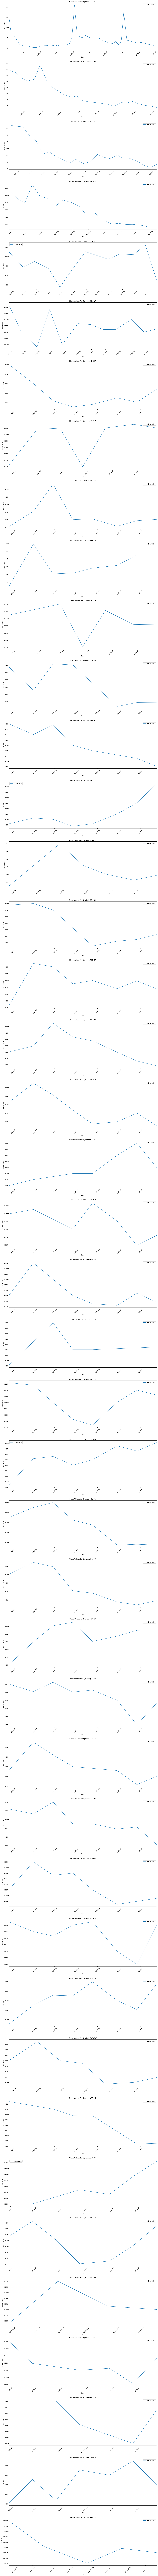

In [53]:
plot_values_by_symbol(ticker_mth_hist_df,(penny_stock_month_end_df.iloc[:,0]),'close')

**Remarks:**
- no observable downward/upward/seasonal trend across the penny stocks

In [54]:
penny_stock_mth_start_end_df = get_min_max_date_for_stock_list(ticker_mth_hist_df,penny_stock_month_end_df.iloc[:,0])

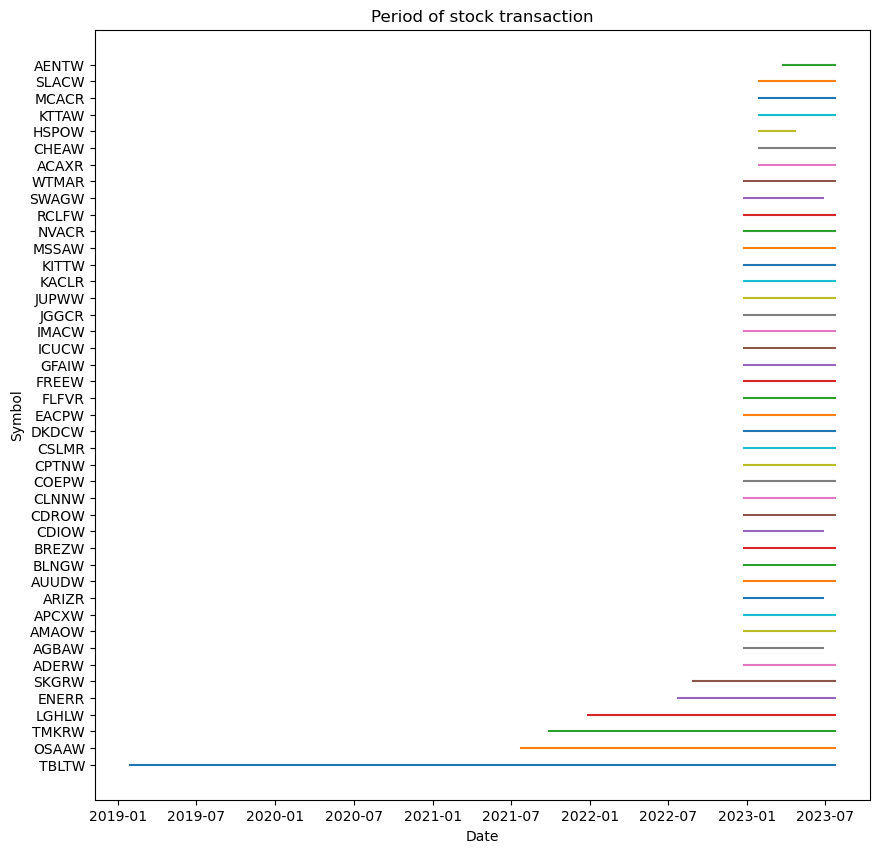

In [55]:
plot_min_max_date_for_hist_data(penny_stock_mth_start_end_df)

**Observations:**
- the stocks from penny_stock_month_end_df are quite new (from 2019-01 onwards)
- of which, most stocks only start trading from 2023 onwards
- this means that most stocks do not stay as penny stock all the way since first listed

##### 3.2.1.1.2 Year-end

In [56]:
penny_stock_year_start_end_df = get_min_max_date_for_stock_list(ticker_year_hist_df,penny_stock_year_end_df.iloc[:,0])

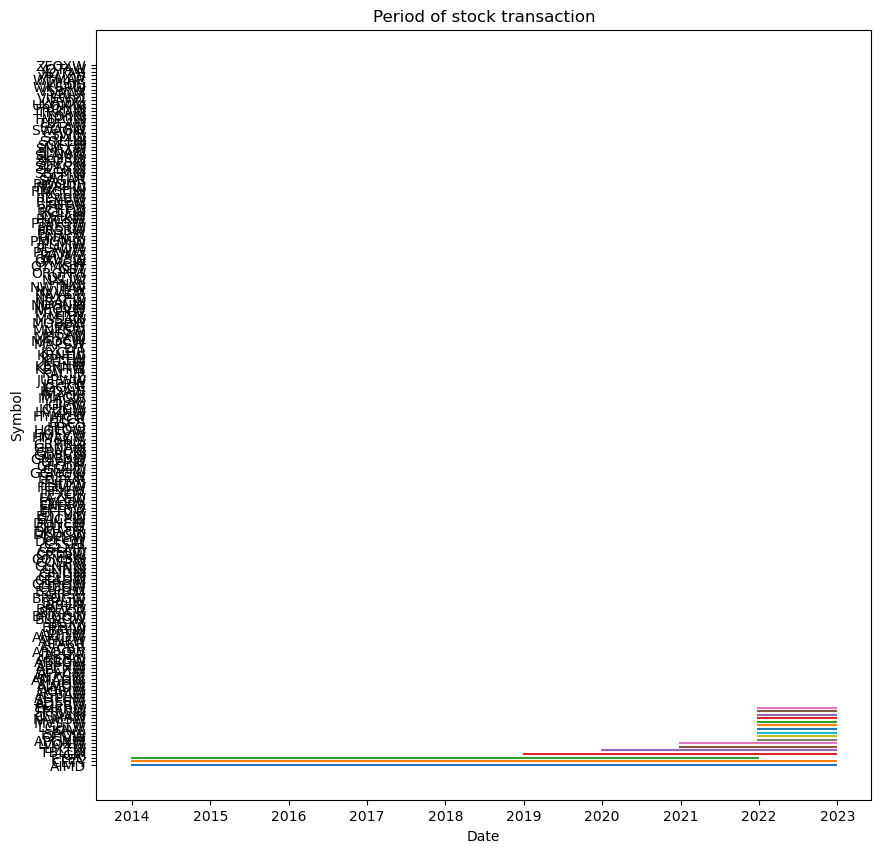

In [57]:
plot_min_max_date_for_hist_data(penny_stock_year_start_end_df)

**Observations:**
- the stocks from penny_stock_year_end_df are mostly quite new (from 2022 onwards)
- this is congruent with earlier observation that that most stocks do not stay as penny stock all the way since first listed

#### 3.2.1.2 High value stock

##### 3.2.1.2.1 Month-end

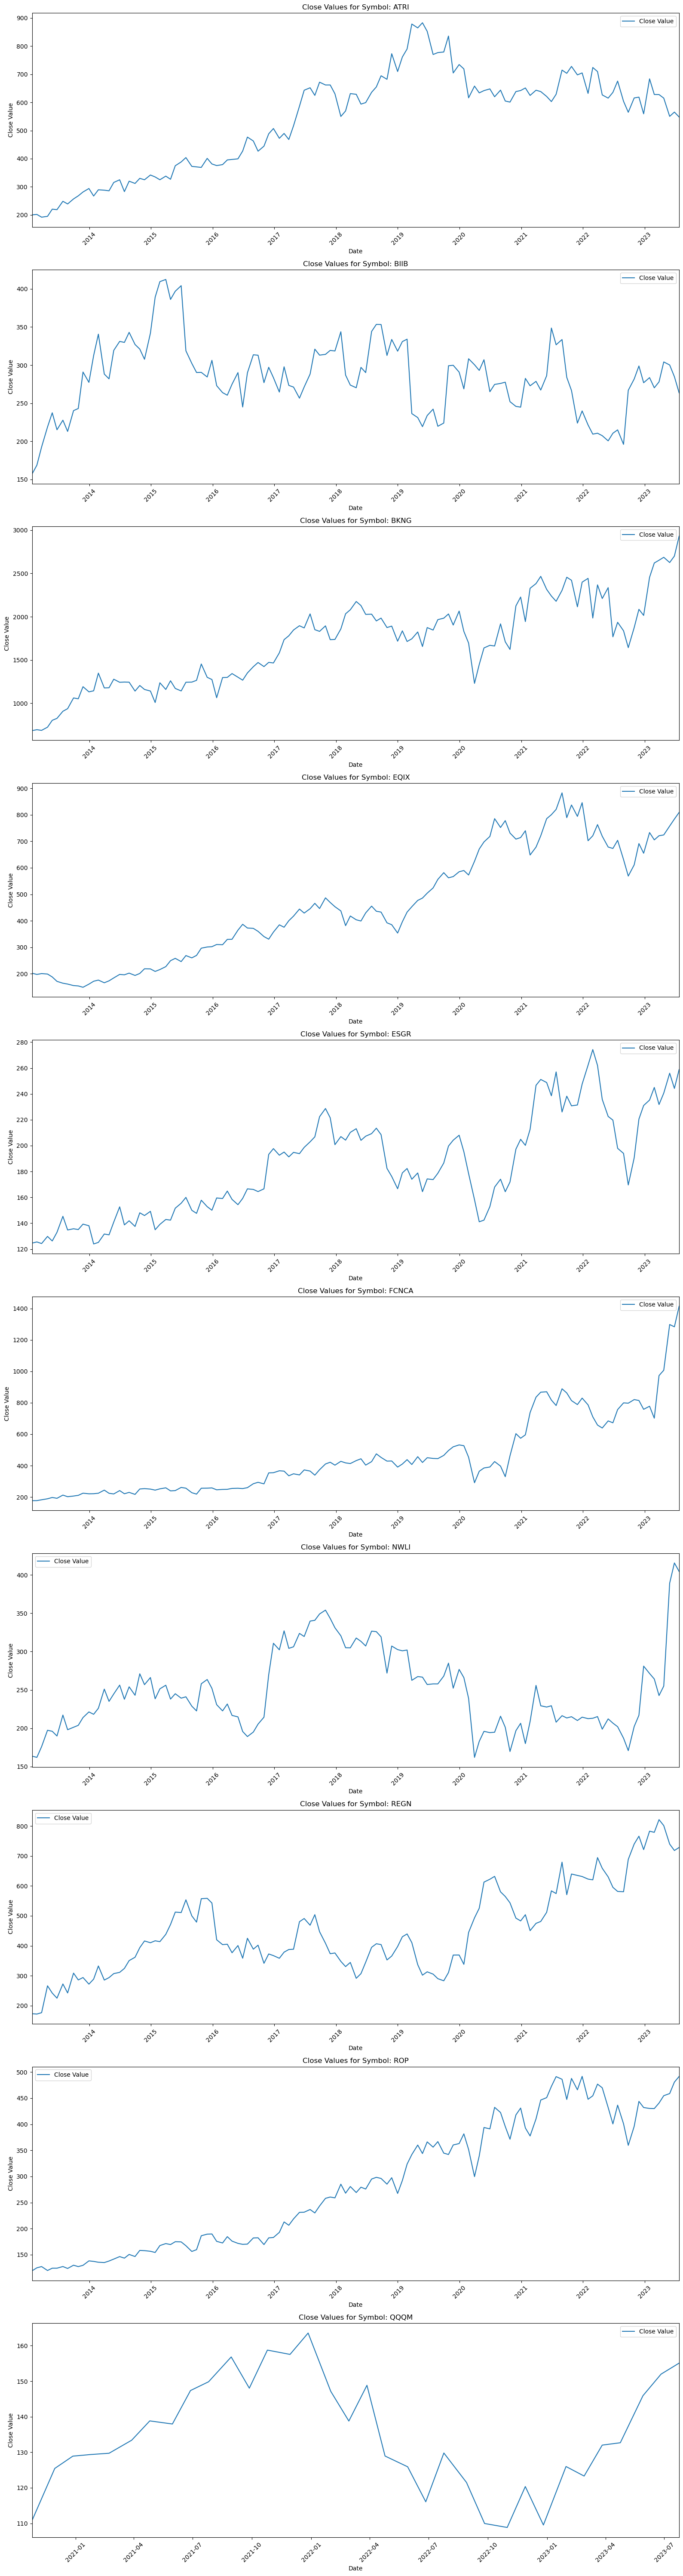

In [58]:
plot_values_by_symbol(ticker_mth_hist_df,(high_value_100_stock_month_end_df.iloc[:,0]),'close')

**Remarks:**
- no observable downward/upward/seasonal trend across the high valued stock stocks

In [59]:
high_value_stock_mth_start_end_df = get_min_max_date_for_stock_list(ticker_mth_hist_df,high_value_100_stock_month_end_df.iloc[:,0])

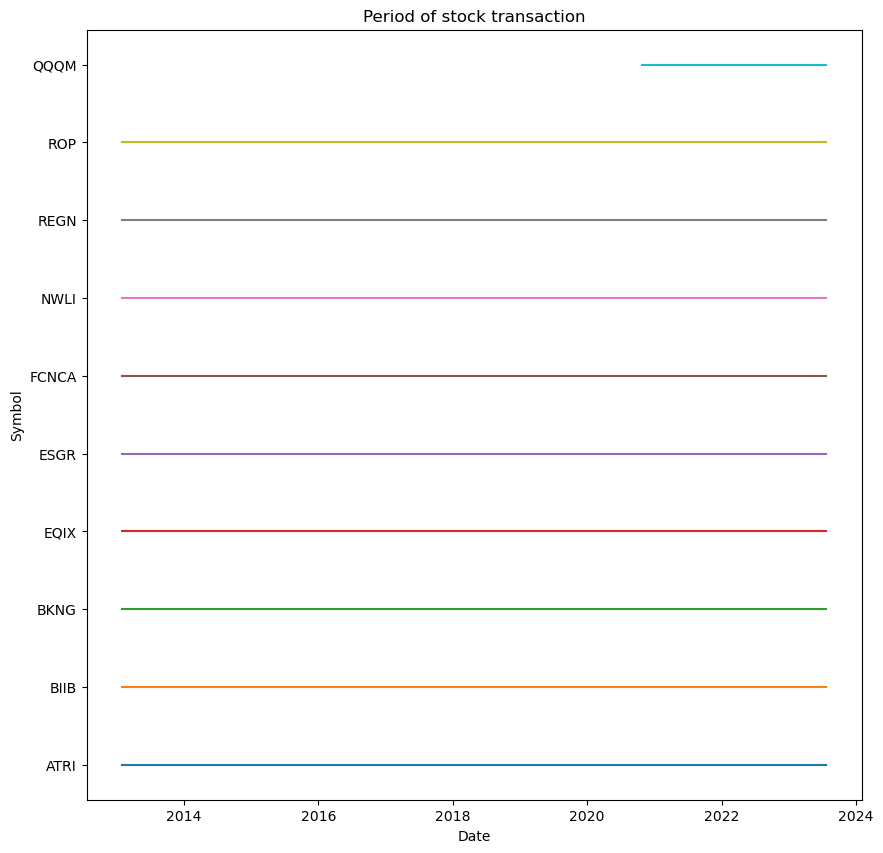

In [60]:
plot_min_max_date_for_hist_data(high_value_stock_mth_start_end_df)

**Observations:**
- the stocks from high_value_100_stock_month_end_df are mostly highly valued since 2013
- this means that there are stocks which are consistently highly valued over the years

##### 3.2.1.2.2 Year-end

In [62]:
high_value_stock_year_start_end_df = get_min_max_date_for_stock_list(ticker_year_hist_df,high_value_100_stock_year_end_df.iloc[:,0])

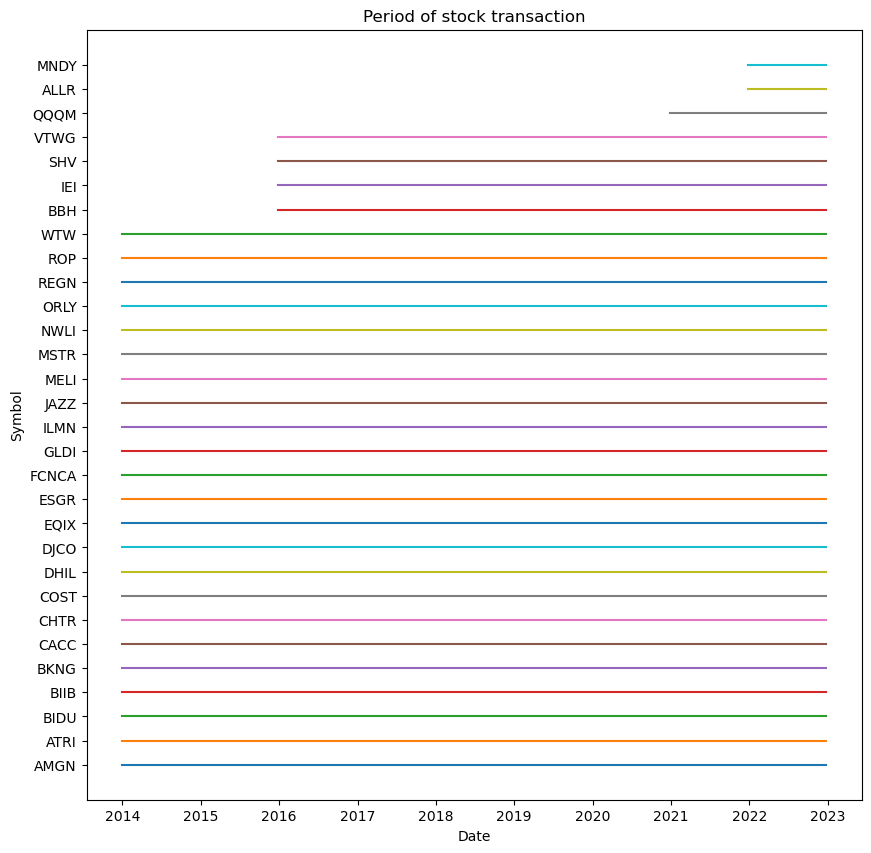

In [63]:
plot_min_max_date_for_hist_data(high_value_stock_year_start_end_df)

**Observations:**
- the stocks from high_value_100_stock_year_end_df are mostly highly valued since 2014
- this means that there are stocks which are consistently highly valued over the years

#### 3.2.1.3 Low value stock

##### 3.2.1.3.1 Year-end

In [69]:
low_value_5_stock_year_start_end_df = get_min_max_date_for_stock_list(ticker_year_hist_df,low_value_5_stock_year_end_df.iloc[:,0])

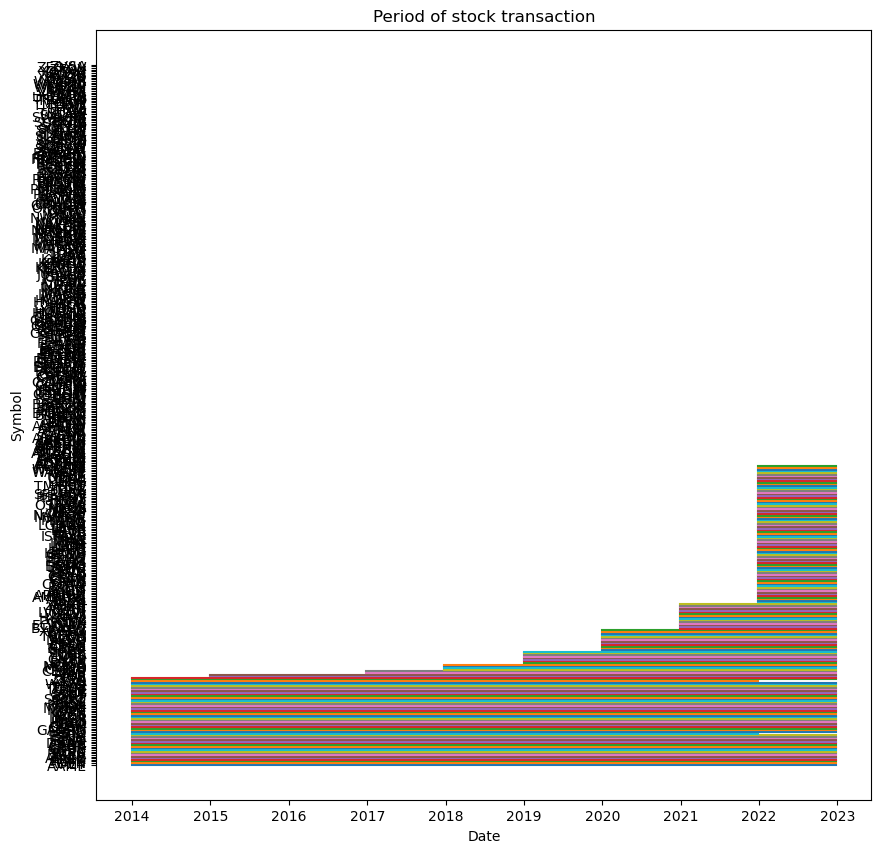

In [70]:
plot_min_max_date_for_hist_data(low_value_5_stock_year_start_end_df)

**Observations:**
- there are quite a lot of stocks from low_value_5_stock_year_end_df mostly low valued (<$5) since 2014
- this means that there stocks can be consistently low valued over the years

In [71]:
low_value_10_stock_year_start_end_df = get_min_max_date_for_stock_list(ticker_year_hist_df,low_value_10_stock_year_end_df.iloc[:,0])

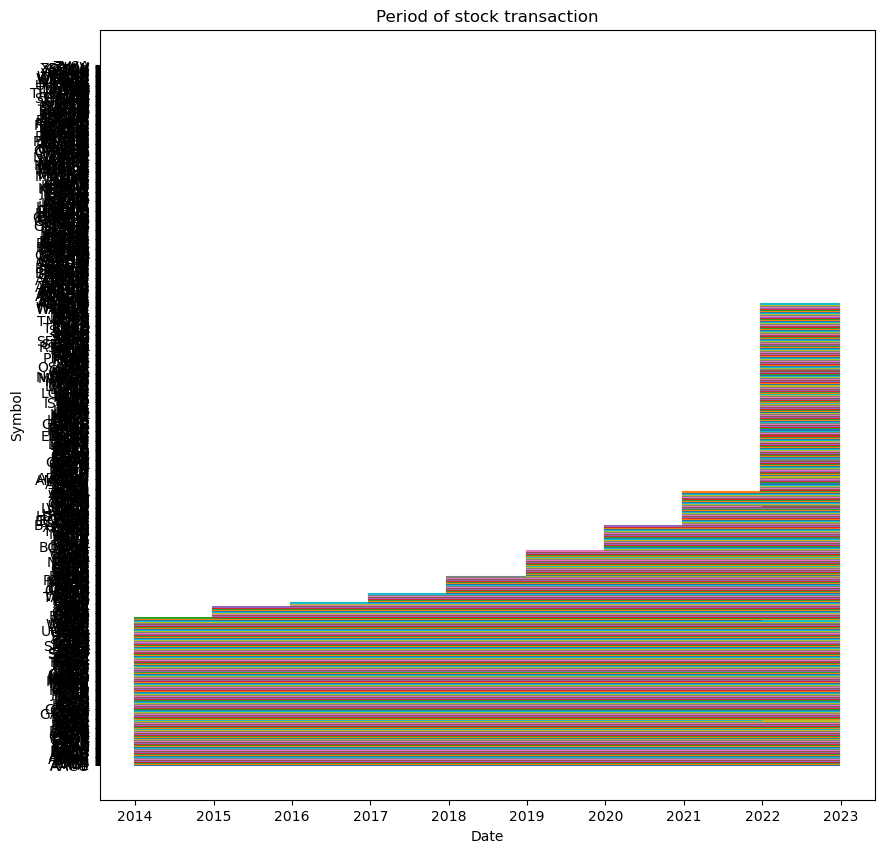

In [72]:
plot_min_max_date_for_hist_data(low_value_10_stock_year_start_end_df)

**Observations:**
- the stocks from low_value_10_stock_year_end_df are mostly low valued (<$10) since 2014
- this means that there are stocks which are consistently low valued over the years